In [57]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from MITgcmutils import rdmds
import cmocean

In [49]:
it = 144

In [50]:
pdir = '/home/hajsong/PDAF/tutorial_global_oce_latlon/run_pdaf/'
uvel_a, it_a, _ = rdmds(pdir+'UVEL_analysis', it, lev=0, returnmeta=True)
uvel_f, it_a, _ = rdmds(pdir+'UVEL_forecast', it, lev=0, returnmeta=True)
vvel_a, it_a, _ = rdmds(pdir+'VVEL_analysis', it, lev=0, returnmeta=True)
vvel_f, it_a, _ = rdmds(pdir+'VVEL_forecast', it, lev=0, returnmeta=True)

In [51]:
uc_a = uvel_a.copy()
uc_a[1:-1, :-1] = 0.5 * (uvel_a[1:-1, :-1] + uvel_a[1:-1, 1:])
uc_a[1:-1, -1] = 0.5 * (uvel_a[1:-1, 0] + uvel_a[1:-1, -1])
uc_f = uvel_f.copy()
uc_f[1:-1, :-1] = 0.5 * (uvel_f[1:-1, :-1] + uvel_f[1:-1, 1:])
uc_f[1:-1, -1] = 0.5 * (uvel_f[1:-1, 0] + uvel_f[1:-1, -1])

vc_a = vvel_a.copy()
vc_a[1:-1, :] = 0.5 * (vvel_a[2:, :] + vvel_a[1:-1, :])
vc_f = vvel_f.copy()
vc_f[1:-1, :] = 0.5 * (vvel_f[2:, :] + vvel_f[1:-1, :])


In [52]:
xc = rdmds(pdir+'XC')
yc = rdmds(pdir+'YC')
hfacc = rdmds(pdir+'hFacC')
msk = hfacc[0,...]
msk[msk==0]=np.nan
msk[msk>0] = 1

/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


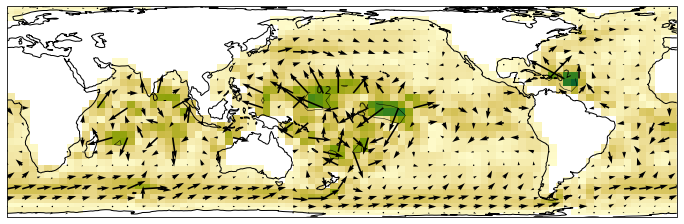

In [61]:
fig1 = plt.figure(figsize=(12, 6),facecolor = 'w')
ax1 = fig1.add_subplot(1, 1, 1, projection=ccrs.LambertCylindrical(central_longitude=180.0))
ax1.coastlines(resolution='110m')
spd = np.sqrt(uc_a**2 + vc_a**2)
p1 = ax1.pcolormesh(xc, yc, spd*msk, zorder=0, cmap=cmocean.cm.speed, vmin=0, vmax=.5, transform=ccrs.PlateCarree(),rasterized = True)
c1 = ax1.contour(xc, yc, spd*msk, np.arange(0, 1.1, .2), colors='k', linewidths=0.5, transform=ccrs.PlateCarree(),rasterized = True)
ax1.clabel(c1, fmt='%3.1f')
p1 = ax1.quiver(xc[::vv, ::vv], yc[::vv, ::vv], (uc_a*msk)[::vv, ::vv], (vc_a*msk)[::vv, ::vv], 
                transform=ccrs.PlateCarree(),rasterized = True, scale=5)

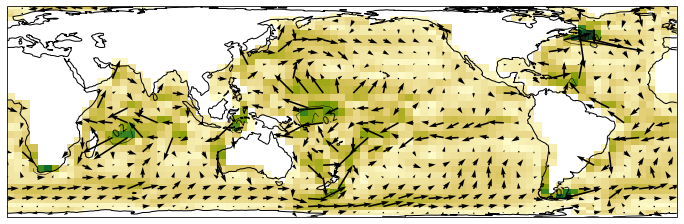

In [60]:
fig1 = plt.figure(figsize=(12, 6),facecolor = 'w')
ax1 = fig1.add_subplot(1, 1, 1, projection=ccrs.LambertCylindrical(central_longitude=180.0))
ax1.coastlines(resolution='110m')
spd = np.sqrt(uc_f**2 + vc_f**2)
p1 = ax1.pcolormesh(xc, yc, spd*msk, zorder=0, cmap=cmocean.cm.speed, vmin=0, vmax=0.5, transform=ccrs.PlateCarree(),rasterized = True)
c1 = ax1.contour(xc, yc, spd*msk, np.arange(0, 1.1, .2), colors='k', linewidths=0.5, transform=ccrs.PlateCarree(),rasterized = True)
ax1.clabel(c1, fmt='%3.1f')
p1 = ax1.quiver(xc[::vv, ::vv], yc[::vv, ::vv], (uc_f*msk)[::vv, ::vv], (vc_f*msk)[::vv, ::vv], 
                transform=ccrs.PlateCarree(),rasterized = True, scale=5)

/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 864x864 with 0 Axes>

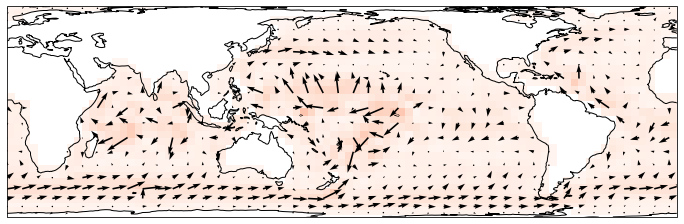

<Figure size 864x864 with 0 Axes>

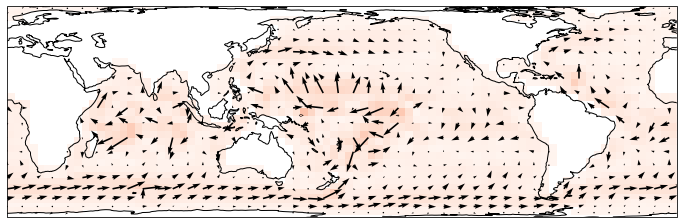

<Figure size 864x864 with 0 Axes>

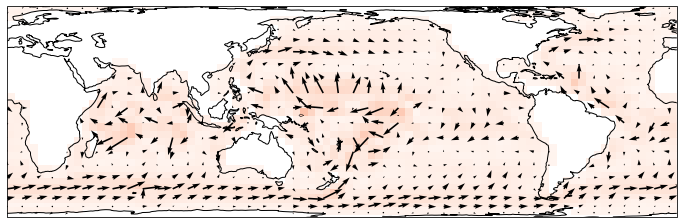

<Figure size 864x864 with 0 Axes>

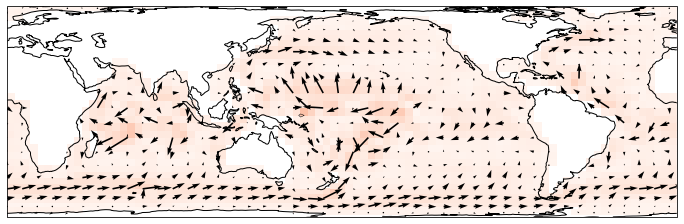

<Figure size 864x864 with 0 Axes>

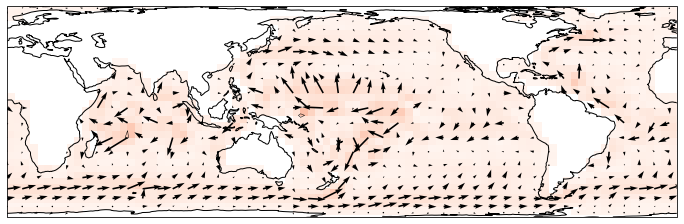

<Figure size 864x864 with 0 Axes>

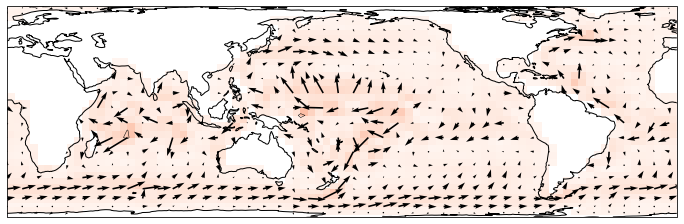

<Figure size 864x864 with 0 Axes>

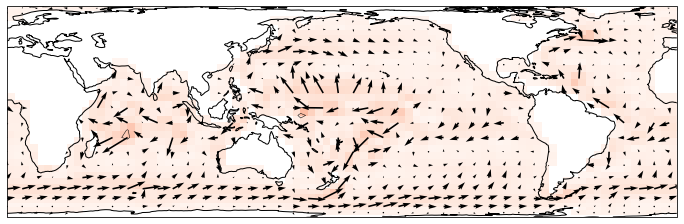

<Figure size 864x864 with 0 Axes>

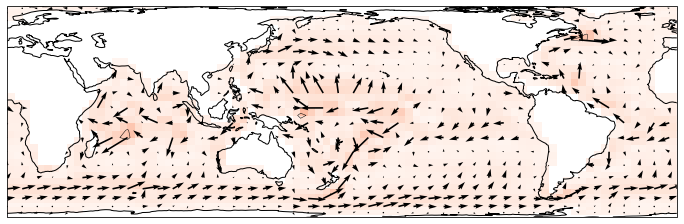

<Figure size 864x864 with 0 Axes>

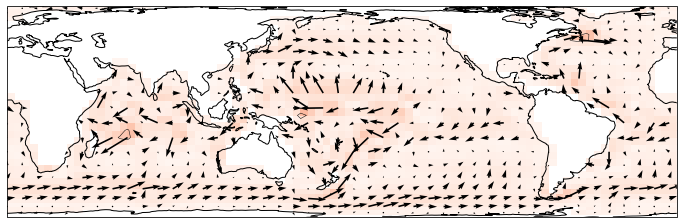

<Figure size 864x864 with 0 Axes>

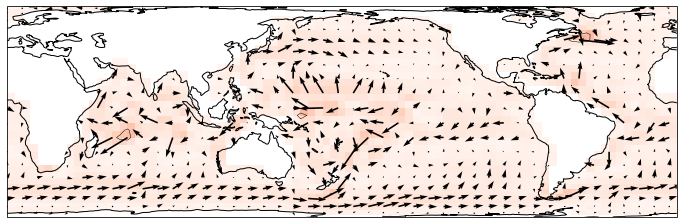

<Figure size 864x864 with 0 Axes>

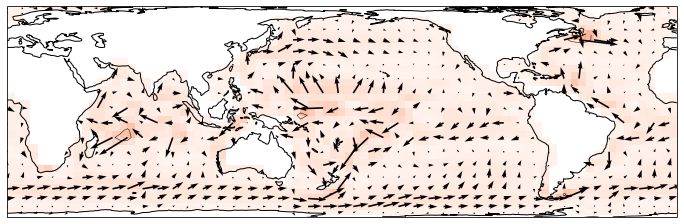

<Figure size 864x864 with 0 Axes>

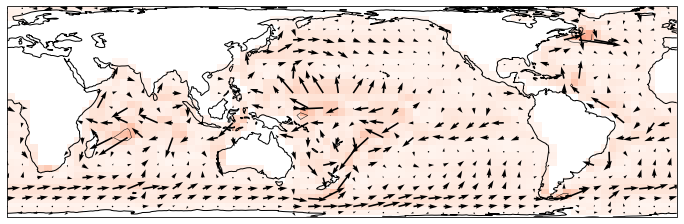

<Figure size 864x864 with 0 Axes>

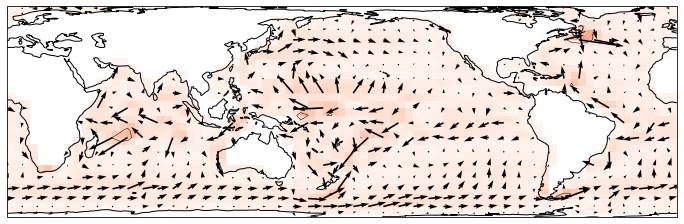

<Figure size 864x864 with 0 Axes>

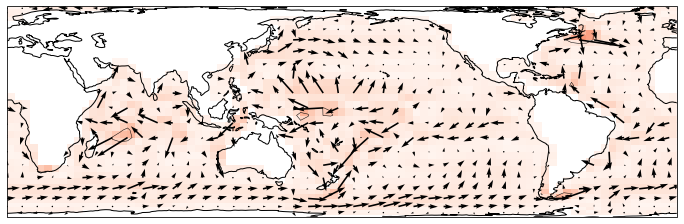

<Figure size 864x864 with 0 Axes>

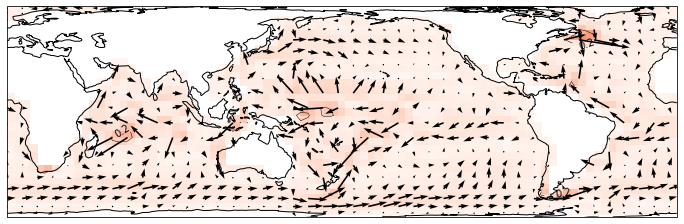

<Figure size 864x864 with 0 Axes>

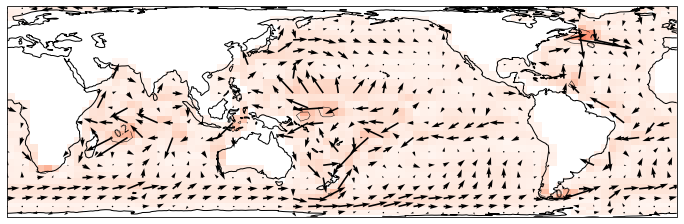

<Figure size 864x864 with 0 Axes>

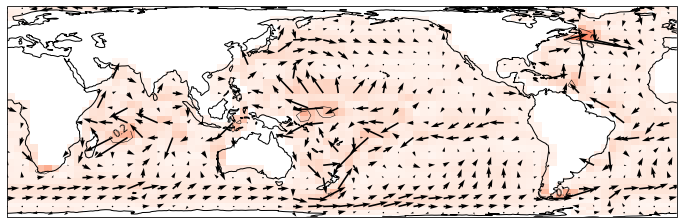

<Figure size 864x864 with 0 Axes>

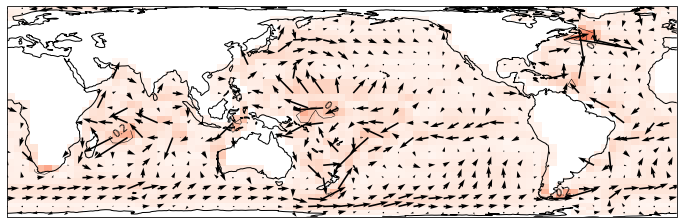

<Figure size 864x864 with 0 Axes>

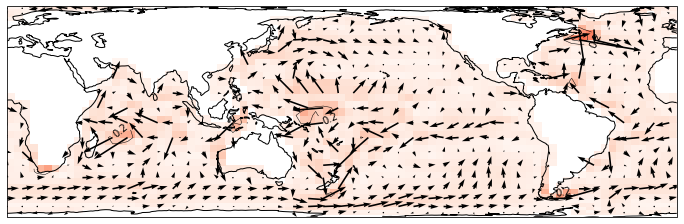

<Figure size 864x864 with 0 Axes>

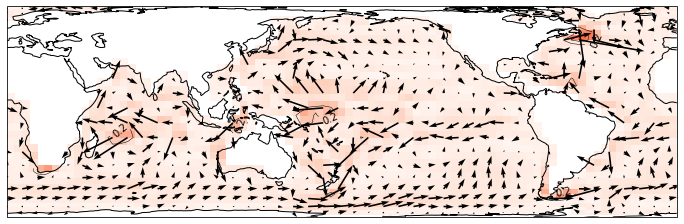

In [55]:
# fig1 = plt.figure(figsize=(12, 12),facecolor = 'w')
for i in range(1,21):
    fig1 = plt.figure(figsize=(12, 12),facecolor = 'w')
    if i < 10: 
        fname = '00'+str(i)
    else:
        fname = '0'+str(i)
#     uvel_a, it_a, _ = rdmds(pdir+'UVEL_'+fname+'_analysis', it, lev=0, returnmeta=True)
    uvel_f, it_a, _ = rdmds(pdir+'UVEL_'+fname+'_forecast', it, lev=0, returnmeta=True)
#     vvel_a, it_a, _ = rdmds(pdir+'VVEL_'+fname+'_analysis', it, lev=0, returnmeta=True)
    vvel_f, it_a, _ = rdmds(pdir+'VVEL_'+fname+'_forecast', it, lev=0, returnmeta=True)

#     uc_a = uvel_a.copy()
#     uc_a[1:-1, :-1] = 0.5 * (uvel_a[1:-1, :-1] + uvel_a[1:-1, 1:])
#     uc_a[1:-1, -1] = 0.5 * (uvel_a[1:-1, 0] + uvel_a[1:-1, -1])
    uc_f = uvel_f.copy()
    uc_f[1:-1, :-1] = 0.5 * (uvel_f[1:-1, :-1] + uvel_f[1:-1, 1:])
    uc_f[1:-1, -1] = 0.5 * (uvel_f[1:-1, 0] + uvel_f[1:-1, -1])

#     vc_a = vvel_a.copy()
#     vc_a[1:-1, :] = 0.5 * (vvel_a[2:, :] + vvel_a[1:-1, :])
    vc_f = vvel_f.copy()
    vc_f[1:-1, :] = 0.5 * (vvel_f[2:, :] + vvel_f[1:-1, :])

    fig1 = plt.figure(figsize=(12, 6),facecolor = 'w')
    ax1 = fig1.add_subplot(1, 1, 1, projection=ccrs.LambertCylindrical(central_longitude=180.0))
    ax1.coastlines(resolution='110m')
    spd = np.sqrt(uc_f**2 + vc_f**2)
    p1 = ax1.pcolormesh(xc, yc, spd*msk, zorder=0, cmap='Reds', vmin=0, vmax=1, transform=ccrs.PlateCarree(),rasterized = True)
    c1 = ax1.contour(xc, yc, spd*msk, np.arange(0, 1.1, .2), colors='k', linewidths=0.5, transform=ccrs.PlateCarree(),rasterized = True)
    ax1.clabel(c1, fmt='%3.1f')
    p1 = ax1.quiver(xc[::vv, ::vv], yc[::vv, ::vv], (uc_f*msk)[::vv, ::vv], (vc_f*msk)[::vv, ::vv], 
                    transform=ccrs.PlateCarree(),rasterized = True, scale=5)

/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 864x864 with 0 Axes>

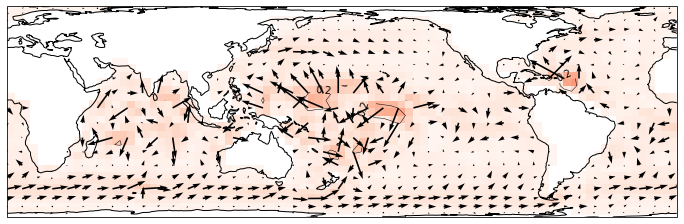

<Figure size 864x864 with 0 Axes>

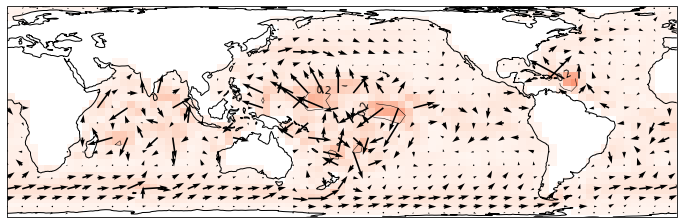

<Figure size 864x864 with 0 Axes>

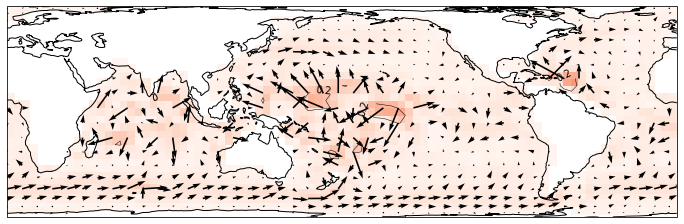

<Figure size 864x864 with 0 Axes>

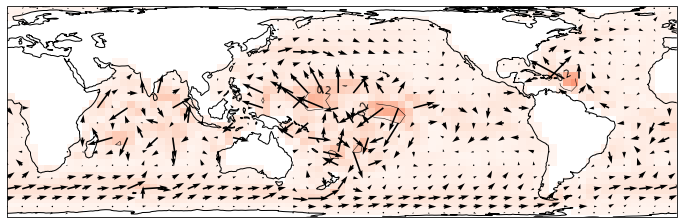

<Figure size 864x864 with 0 Axes>

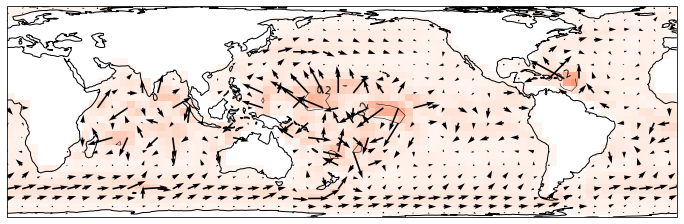

<Figure size 864x864 with 0 Axes>

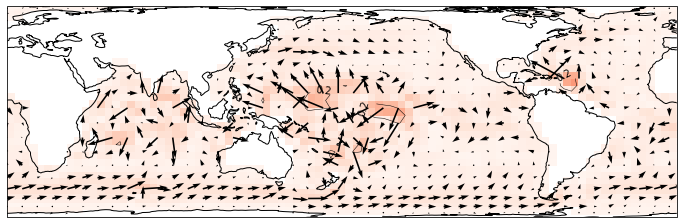

<Figure size 864x864 with 0 Axes>

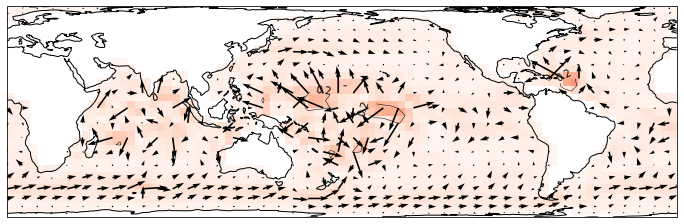

<Figure size 864x864 with 0 Axes>

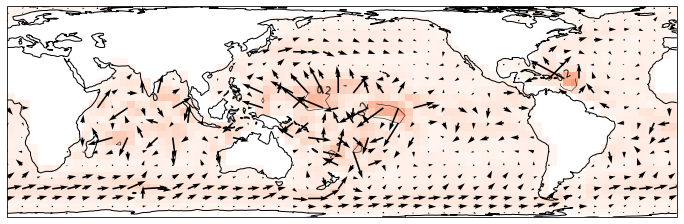

<Figure size 864x864 with 0 Axes>

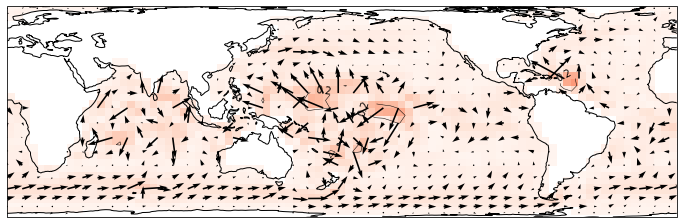

<Figure size 864x864 with 0 Axes>

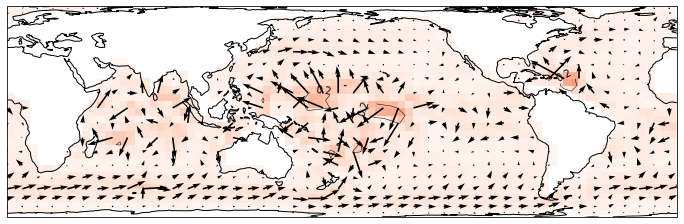

<Figure size 864x864 with 0 Axes>

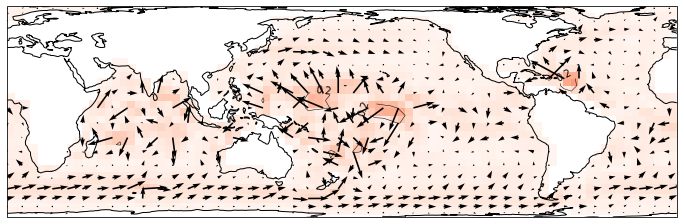

<Figure size 864x864 with 0 Axes>

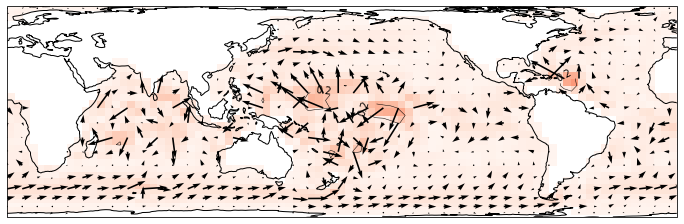

<Figure size 864x864 with 0 Axes>

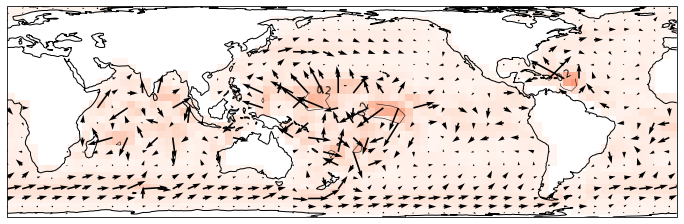

<Figure size 864x864 with 0 Axes>

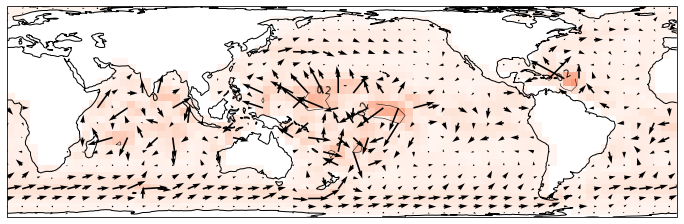

<Figure size 864x864 with 0 Axes>

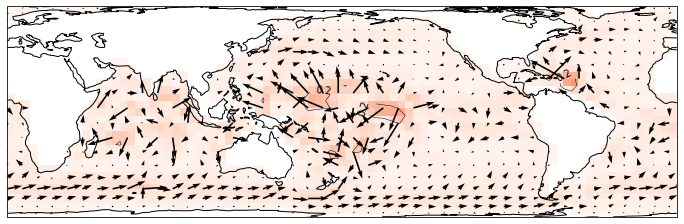

<Figure size 864x864 with 0 Axes>

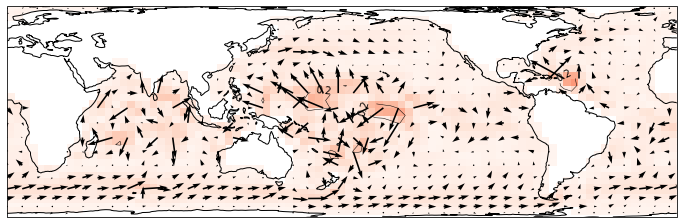

<Figure size 864x864 with 0 Axes>

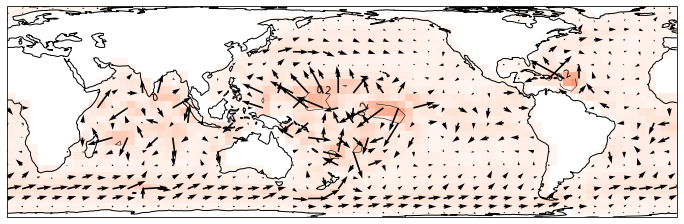

<Figure size 864x864 with 0 Axes>

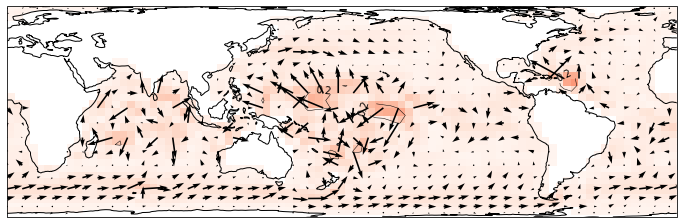

<Figure size 864x864 with 0 Axes>

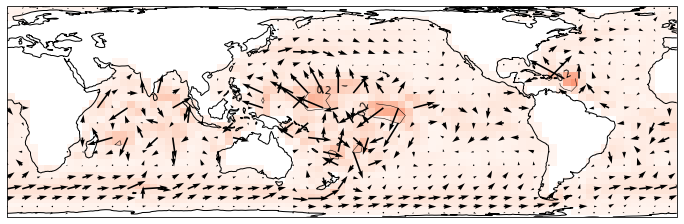

<Figure size 864x864 with 0 Axes>

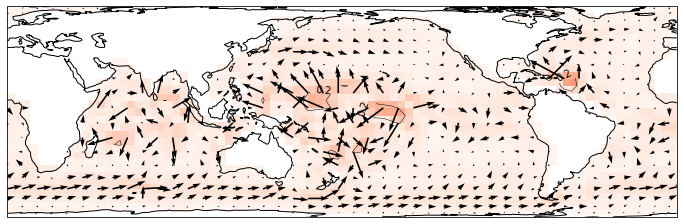

In [56]:
# fig1 = plt.figure(figsize=(12, 12),facecolor = 'w')
for i in range(1,21):
    fig1 = plt.figure(figsize=(12, 12),facecolor = 'w')
    if i < 10: 
        fname = '00'+str(i)
    else:
        fname = '0'+str(i)
        
    uvel_a, it_a, _ = rdmds(pdir+'UVEL_'+fname+'_analysis', it, lev=0, returnmeta=True)
#     uvel_f, it_a, _ = rdmds(pdir+'UVEL_'+fname+'_forecast', it, lev=0, returnmeta=True)
    vvel_a, it_a, _ = rdmds(pdir+'VVEL_'+fname+'_analysis', it, lev=0, returnmeta=True)
#     vvel_f, it_a, _ = rdmds(pdir+'VVEL_'+fname+'_forecast', it, lev=0, returnmeta=True)

    uc_a = uvel_a.copy()
    uc_a[1:-1, :-1] = 0.5 * (uvel_a[1:-1, :-1] + uvel_a[1:-1, 1:])
    uc_a[1:-1, -1] = 0.5 * (uvel_a[1:-1, 0] + uvel_a[1:-1, -1])
#     uc_f = uvel_f.copy()
#     uc_f[1:-1, :-1] = 0.5 * (uvel_f[1:-1, :-1] + uvel_f[1:-1, 1:])
#     uc_f[1:-1, -1] = 0.5 * (uvel_f[1:-1, 0] + uvel_f[1:-1, -1])

    vc_a = vvel_a.copy()
    vc_a[1:-1, :] = 0.5 * (vvel_a[2:, :] + vvel_a[1:-1, :])
#     vc_f = vvel_f.copy()
#     vc_f[1:-1, :] = 0.5 * (vvel_f[2:, :] + vvel_f[1:-1, :])
    
    fig1 = plt.figure(figsize=(12, 6),facecolor = 'w')
    ax1 = fig1.add_subplot(1, 1, 1, projection=ccrs.LambertCylindrical(central_longitude=180.0))
    ax1.coastlines(resolution='110m')
    spd = np.sqrt(uc_a**2 + vc_a**2)
    p1 = ax1.pcolormesh(xc, yc, spd*msk, zorder=0, cmap='Reds', vmin=0, vmax=1, transform=ccrs.PlateCarree(),rasterized = True)
    c1 = ax1.contour(xc, yc, spd*msk, np.arange(0, 1.1, .2), colors='k', linewidths=0.5, transform=ccrs.PlateCarree(),rasterized = True)
    ax1.clabel(c1, fmt='%3.1f')
    p1 = ax1.quiver(xc[::vv, ::vv], yc[::vv, ::vv], (uc_a*msk)[::vv, ::vv], (vc_a*msk)[::vv, ::vv], 
                    transform=ccrs.PlateCarree(),rasterized = True, scale=5)